<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Series_temporais/blob/main/Series_Temporais_Tempertura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [2]:
!pip install scipy

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.8 MB/s eta 0:00:00


In [4]:
from pmdarima.arima import auto_arima

In [5]:
df = pd.read_excel('/content/drive/MyDrive/temperature.xlsx')
df.head()

,Date,Daily minimum temperatures
0,1981-01-01 00:00:00,20.7
1,1981-02-01 00:00:00,17.9
2,1981-03-01 00:00:00,18.8
3,1981-04-01 00:00:00,14.6
4,1981-05-01 00:00:00,15.8


In [6]:
df.shape

(3647, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3647 non-null   object 
 1   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


In [14]:
df.index = pd.to_datetime(df.index, errors='coerce')

In [15]:
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

In [16]:
df.sort_index(inplace=True)

In [17]:
df.describe()

,Daily minimum temperatures
count,3647.000000
mean,11.186647
std,4.061671
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


<Figure size 2000x1000 with 0 Axes>

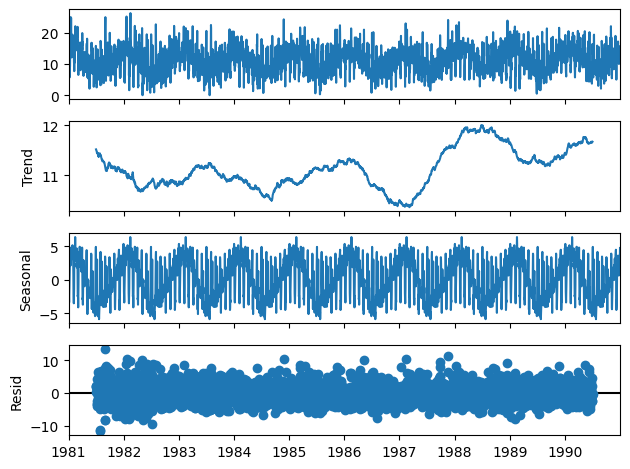

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model='add',period=365)

fig = plt.figure(figsize=(20,10))
fig = resultado.plot()

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Daily minimum temperatures'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.331541
p-value: 0.013526


In [22]:
fit_arima = auto_arima(df, d=1,start_p = 1, start_q=1, max_p=3,max_q=3,
                       seasonal = True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True
                       )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=10.43 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=0.75 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.27 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.12 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=18.15 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=9.71 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=1.02 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=1.98 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.89 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=31.79 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=20.16 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=5.52 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(3,1,0))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
predicoes = resultado_sarimax.get_prediction(start= -60)
predicao_media = predicoes.predicted_mean

In [28]:
intevalo_confianca = predicoes.conf_int()
limites_abaixo = intevalo_confianca.iloc[:,0]
limites_acima = intevalo_confianca.iloc[:,1]

In [29]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

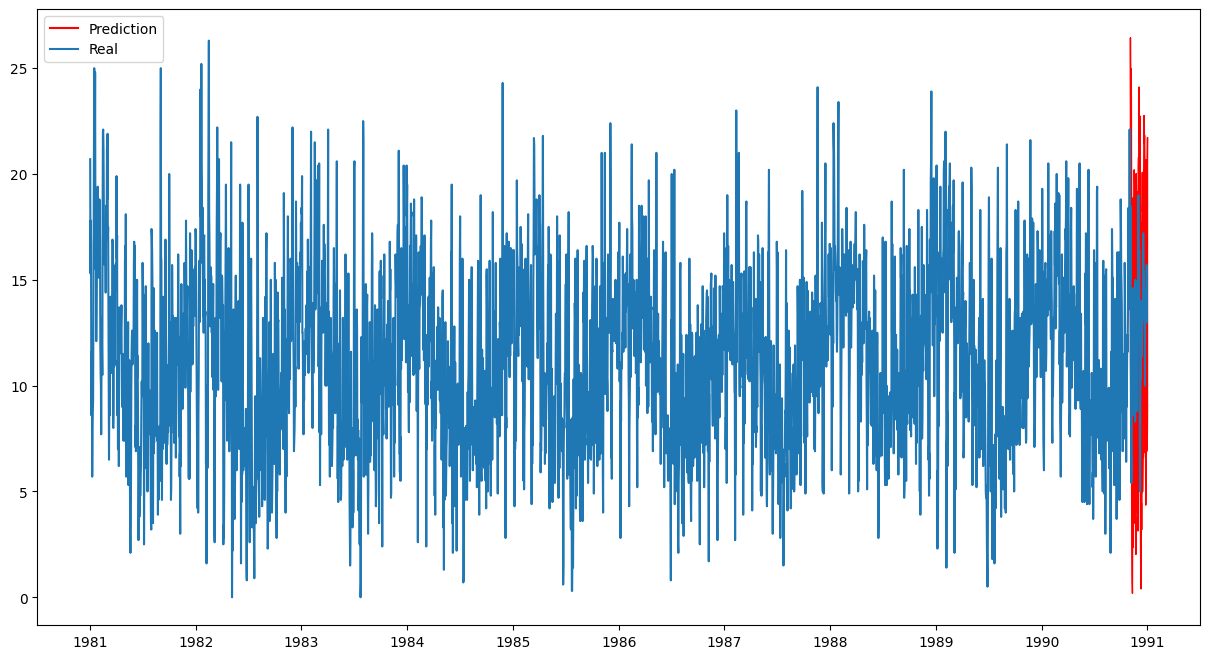

In [33]:
plt.figure(figsize=(15,8))
plt.plot(datas_previsao,predicao_media.values, color= 'red',label = 'Prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color= 'red')
plt.plot(datas,df.values, label = 'Real')
plt.legend(loc='upper left')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
rmse = sqrt(mean_squared_error(df[-60:].values, predicao_media))
print(rmse)

3.012457329818421
